In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [26]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.rename(columns = {'Genre': 'Gender'}, inplace=True)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
data.size

1000

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
Dbscan = DBSCAN( eps=3, min_samples=3, metric='manhattan')

In [10]:
Dbscan.fit(data[["Spending Score (1-100)" , "Annual Income (k$)"]])

DBSCAN(eps=3, metric='manhattan', min_samples=3)

In [11]:
labels = Dbscan.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1,  1,  1,  1,  2,  2,  1,  3,  1,  3,  1,  1,
        3,  1,  2, -1,  1,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  4,  5, -1, -1,  6, -1, -1, -1,  6, -1,  6, -1,  7,  8, -1,
        8,  7, -1,  7,  8, -1, -1, 10, -1, -1, -1,  9, 11, 10, 11, 10, 11,
        9, 11, 10, -1,  9, -1,  9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       12, -1, 12, -1, 12, -1, 12, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

### if label value is -1 this means it's outlier

In [12]:
Dbscan.core_sample_indices_

array([ 10,  12,  14,  57,  58,  59,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  72,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 118, 119, 125, 129, 131, 133, 134,
       137, 139, 147, 149, 150, 151, 152, 153, 155, 159, 170, 174, 176],
      dtype=int64)

In [13]:
Cluster_no = np.zeros_like(labels,dtype=bool)
Cluster_no

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [14]:
Cluster_no[Dbscan.core_sample_indices_]=True

In [15]:
Cluster_no

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,

In [16]:
n_clusters = len(set(labels))-(1 if -1 in labels else 0)

In [17]:
n_clusters

13

### Lets define our own DBSCAN to visualize our dataset

In [51]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    plt.figure(figsize=(16,8))
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.xlabel("Spending Score (1-100)")
    plt.ylabel("Annual Income (k$)")
    plt.title("DBSCAN")

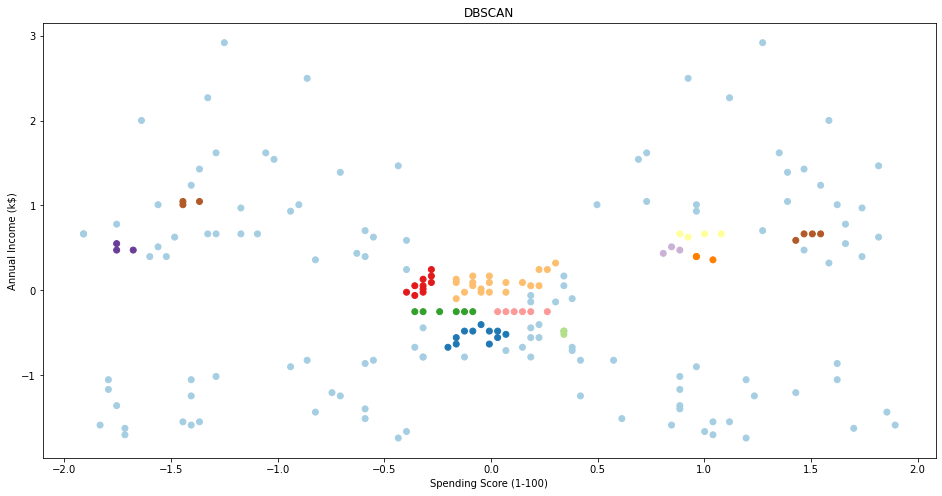

In [52]:
dbscan(data[["Spending Score (1-100)" , "Annual Income (k$)"]],eps = 0.1 , min_samples=3)

### To see how DBSCAN works please read this blog:-     https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/